In [60]:
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
import math

In [2]:
#ESERCIZIO 0

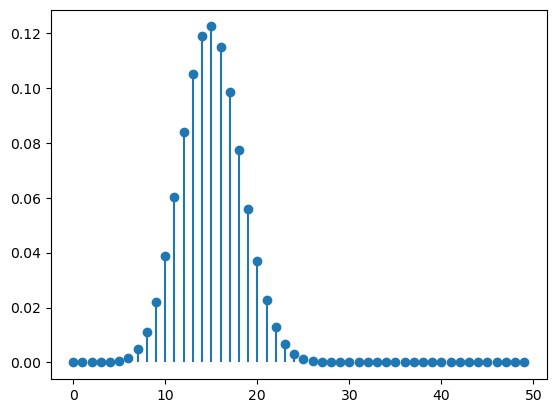

In [5]:
#0.4 
data = {'variabile_binomiale': [0, 1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Definire i parametri della distribuzione binomiale
k = 50  # numero di tentativi
p = 0.3  # probabilità di successo in ogni tentativo

# Calcolare la funzione di massa di probabilità (PMF)
Y=st.binom(50,0.3)
x=np.arange(0,50)
plt.vlines(x,0,Y.pmf(x))
plt.plot(x,Y.pmf(x),'o')
plt.show()

In [6]:
#ESERCIZIO 1

In [7]:
finanziamenti = pd.read_csv('finanziamenti.csv', decimal = ',', sep = ';', index_col = 0)
finanziamenti

,TemaPrioritario,FONTE,CodiceCategoria,CATEGORIA,UNITA,FinProvincia,FinRegione,TotSpese
id,,,,,,,,
4,5,Compet. per le imprese,18,TECNOLOGIE INFORMATICHE,ASSISI,22356.25,22356.25,83037.5
38,5,Compet. per le imprese,40,OPERE E INFRASTRUTTURE PER LA RICERCA,ASSISI,99750.00,99750.00,370500.0
39,11,Agenda digitale,40,OPERE E INFRASTRUTTURE PER LA RICERCA,ASSISI,3802.90,3802.90,18423.2
43,4,Ricerca e innovazione,18,TECNOLOGIE INFORMATICHE,ASSISI,193020.00,193020.00,474360.0
73,6,Ricerca e innovazione,39,"OPERE, IMPIANTI ED ATTREZZATURE PER ATTIVITA' ...",ASSISI,10688.70,10688.70,NaN
...,...,...,...,...,...,...,...,...
3306,43,Energia e efficienza energetica,8,SOCIALI E SCOLASTICHE,UMBERTIDE,116836.55,116836.55,NaN
3313,61,Rinnovamento urbano e rurale,6,PRODUZIONE DI ENERGIA,UMBERTIDE,89297.33,89297.33,NaN
3314,61,Rinnovamento urbano e rurale,99,ALTRE INFRASTRUTTURE SOCIALI,UMBERTIDE,125582.65,125582.66,NaN


In [9]:
#1.1 CodiceCategoria è nominale, ordinale o scalare?
print(finanziamenti.CodiceCategoria)
print('CodiceCategoria è nominale')

id
4       18
38      40
39      40
43      18
73      39
        ..
3306     8
3313     6
3314    99
3507    12
3609    25
Name: CodiceCategoria, Length: 3668, dtype: int64
CodiceCategoria è nominale


In [10]:
#1.2 Tabella frequenze assolute di UNITA
unita_abs = pd.crosstab(index = finanziamenti['UNITA'],
                       colnames = ['Frequenze assolute'],
                       columns = [''])
unita_abs

Frequenze assolute,
UNITA,
ASSISI,243
CASCIA,13
CASTIGLIONE DEL L,75
CHIUSI,30
CITTA DI CASTELLO,288
CORTONA,1
FOLIGNO,449
GUALDO TADINO,75
GUBBIO,76


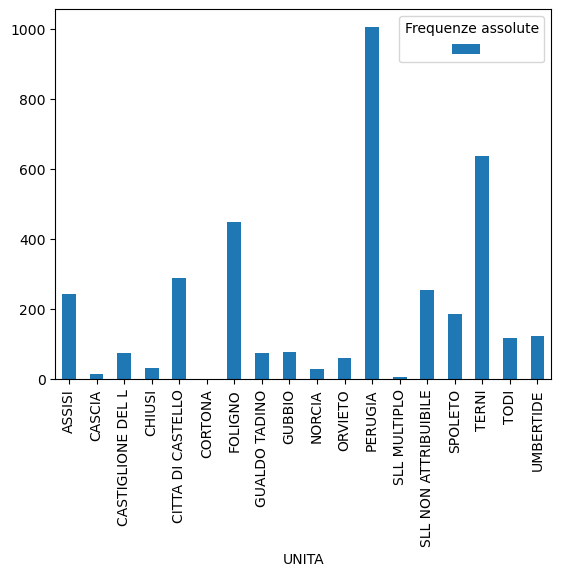

In [11]:
#1.3 Grafico opportuno per descrivere UNITA
unita_abs.plot.bar()
plt.show()

In [12]:
#1.5 Prendiamo in considerazione la quota di finanziamento erogata dalla provincia

In [16]:
'''
1.5.1 Create una variabile progetti_a per i progetti A per i quali il finanziamento provinciale è minore di quello regionale, 
ed una variabile progetti_b per i progetti B per i quali il finanziamento provinciale è minore di quello regionale.
'''
progetti_a = finanziamenti[finanziamenti['FinProvincia'] < finanziamenti['FinRegione']]
progetti_b = finanziamenti[finanziamenti['FinProvincia'] >= finanziamenti['FinRegione']]

3284

In [18]:
#1.5.2 Quanti sono i progetti di tipo A? E quelli di tipo B?
print('I progetti di tipo A sono', len(progetti_a), '\nI progetti di tipo B sono', len(progetti_b))

I progetti di tipo A sono 368 
I progetti di tipo B sono 3284


In [19]:
#1.6

In [20]:
'''
1.6.1 Selezionate i progetti di tipo A che hanno ricevuto un finanziamento provinciale compreso tra 200 euro (incluso) e 1000
euro (escluso) e salvate tale selezione in una variabile chiamata selezione_progetti_a
'''
app = progetti_a[progetti_a['FinProvincia'] >= 200]
selezione_progetti_a = app[app['FinProvincia'] < 1000]
selezione_progetti_a

,TemaPrioritario,FONTE,CodiceCategoria,CATEGORIA,UNITA,FinProvincia,FinRegione,TotSpese
id,,,,,,,,
3198,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,CITTA DI CASTELLO,819.98,819.99,3826.61
3199,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,CITTA DI CASTELLO,945.71,945.72,4413.35
3215,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,CITTA DI CASTELLO,753.66,753.67,3517.09
3224,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,CITTA DI CASTELLO,883.79,883.80,4124.39
1173,5,Compet. per le imprese,40,OPERE E INFRASTRUTTURE PER LA RICERCA,FOLIGNO,861.60,1138.40,2000.00
3454,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,FOLIGNO,879.49,879.50,NaN
2155,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,PERUGIA,995.74,995.75,4646.81
1989,86,Rafforzamento capacitÃ della PA,41,SERVIZI DI ASSISTENZA TECNICA ALLA P.A.,SLL NON ATTRIBUIBILE,361.17,361.18,NaN
1990,86,Rafforzamento capacitÃ della PA,41,SERVIZI DI ASSISTENZA TECNICA ALLA P.A.,SLL NON ATTRIBUIBILE,270.99,271.00,NaN


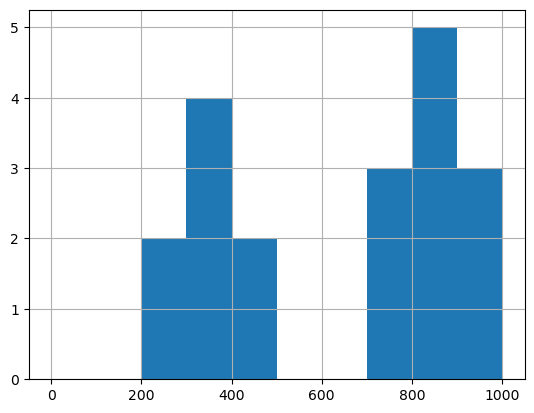

In [24]:
#1.6.2 Tracciare l'istogramma del finanziamento provinciale di tali progetti, imponendo classi di ampiezza di 100 euro
selezione_progetti_a['FinProvincia'].hist(bins = np.arange(0,1001, 100))
plt.show()

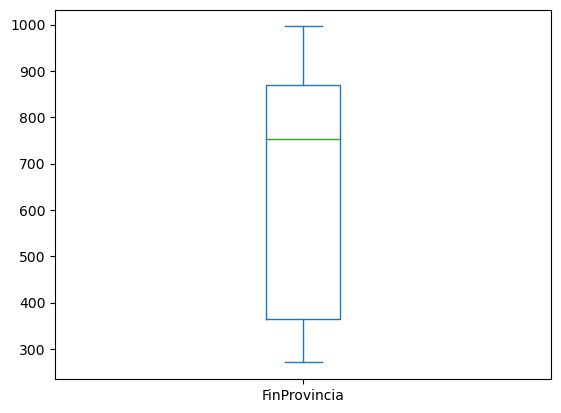

In [25]:
#1.6.3 Tracciare anche il boxplot per la medesima quantità
selezione_progetti_a['FinProvincia'].plot.box()
plt.show()

In [26]:
#1.6.4 Tra i due grafici di sopra, quale ritenete maggiormente informativo e perchè?
print('Tra i due, l istogramma è quello maggiormente informativo perchè mostra che i dati seguono una distribuzione bimodale.')

Tra i due, l istogramma è quello maggiormente informativo perchè mostra che i dati seguono una distribuzione bimodale.


In [27]:
#1.6.5 Tra i progetti di selezione_progetti_a, qual'è stato l'importo medio erogato dalla provincia? Deviazione standard?
print('Importo medio:', selezione_progetti_a['FinProvincia'].mean(), 
      "\nDeviazione standard:", selezione_progetti_a['FinProvincia'].std())

Importo medio: 636.9052631578948 
Deviazione standard: 264.80233322588253


In [28]:
#1.6.6 Quanti hanno ricevuto un finanziamento provinciale compreso tra 500 e 700 euro?
app = selezione_progetti_a[selezione_progetti_a['FinProvincia'] > 500]
len(app[app['FinProvincia'] < 700])

0

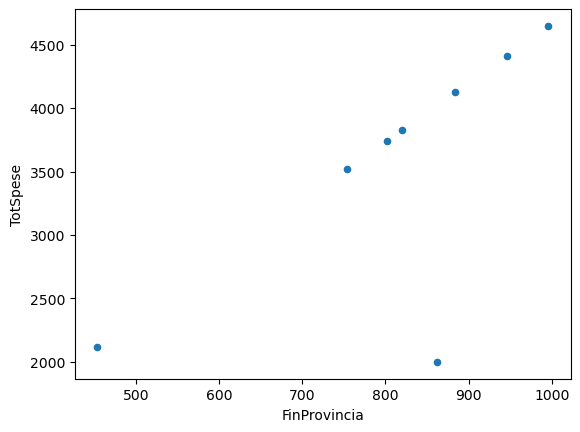

0.6964011723762348
Lo scatter plot evidenzia l esistenza di una relazione diretta abbastanza forte tra i due attributi, e l indice 
di correlazione abbastanza vicino ad 1 conferma tale ipotesi


In [33]:
'''
1.6.7 Usare un grafico e un indice numerico per evidenziare l'esistenza di una relazione tra finanziamento provinciale e spese 
sostenute
'''
selezione_progetti_a.plot.scatter('FinProvincia', 'TotSpese')
plt.show()
print(selezione_progetti_a['FinProvincia'].corr(selezione_progetti_a['TotSpese']))
print('Lo scatter plot evidenzia l esistenza di una relazione diretta abbastanza forte tra i due attributi, e l indice \ndi correlazione abbastanza vicino ad 1 conferma tale ipotesi')

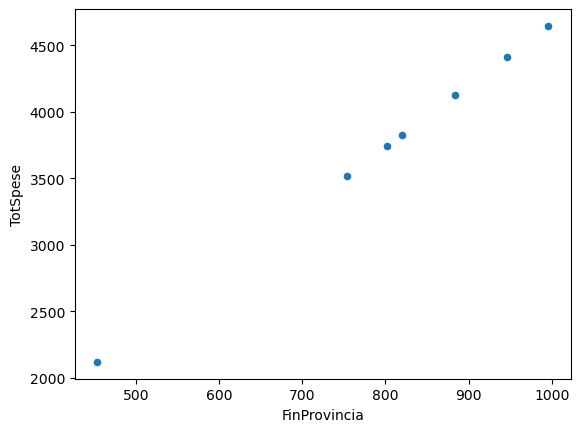

0.9999999999078262
Lo scatter plot, in questo caso, rimane simile a prima a meno dell outlier eliminato, possiamo invece osservare che
l indice di correlazione è molto più vicino ad 1, per cui la relazione di tipo diretta
è più forte di quella di prima.


In [38]:
'''
1.6.8 Nell'esercizio precedente dovrebbe essere chiaramente visibile la presenza di almeno un progetto che si discosta 
dall'andamento generale. Eliminate tali progetti dall'insieme di dati e ripetere le domande del punto precedente 
'''
selezione_progetti_a_filter = selezione_progetti_a[selezione_progetti_a['TotSpese'] > 2000]
selezione_progetti_a_filter.plot.scatter('FinProvincia', 'TotSpese')
plt.show()
print(selezione_progetti_a_filter['FinProvincia'].corr(selezione_progetti_a_filter['TotSpese']))
print('Lo scatter plot, in questo caso, rimane simile a prima a meno dell outlier eliminato, possiamo invece osservare che\nl indice di correlazione è molto più vicino ad 1, per cui la relazione di tipo diretta\nè più forte di quella di prima.')

In [39]:
'''
ESERCIZIO 2
Ritorniamo al dataset completo. I suoi dati costituiscono una fotografia della situazione contabile dopo un anno 
dall'assegnazione del finanziamento, dove TotSpese indica le spese sostenute da allora (può essere mancante).
'''

In [52]:
#2.1 Quanti sono i progetti che non hanno ancora sostenuto spese?
len(finanziamenti.dropna(subset=['TotSpese'])) / len(finanziamenti)

0.6908396946564885

In [44]:
#2.2 Stimare la probabilità che, a distanza di un anno dall'assegnazione del finanziamento, non si siano ancora sostenute spese


0.0005678277621445123

In [58]:
'''
2.3 Consideriamo lo spazio campionario O = R U {NA} che codifica i valori possibili per l'attributo TotSpese. Considerando che
una variabile aleatoria è una funzione X : O -> R, definire opportunamente X così da legarla all'evento "a un anno
dall'assegnazione del finanziamento il progetto non ha ancora sostenuto spese."
'''
print('X è distribuita secondo un modello bernoulliano')

X è distribuita secondo un modello bernoulliano


In [59]:
#2.5 Fornire una stima del parametro di tale legge
finanziamenti['TotSpese'].mean()

111540.26428966066

In [66]:
#2.6 Accettiamo di sbagliare la stima col 95% di probabilità. Qual'è il margine di errore da tollerare?
a = finanziamenti['TotSpese'].std() / math.sqrt(len(finanziamenti))
Z = st.norm()
a * Z.ppf(1- 0.05/2)

6765.183171365392